# Imports

In [1]:
%cd "../.."
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances
import scipy.spatial as sp

from gensim import models
from reduction_dim.correlation_matrix import *
from doc_embedding.moyenne import word_emb_vers_doc_emb_moyenne

/home/id1897/projet-statistique-2022/projet-statistique-2022


# CBOW MDS


### Matrice distance avant reduction

In [2]:
#fichier sous la forme d'un dataframe
cbow_model=pd.read_csv('data/tuning/MDS/cbow_mds_embedding.csv',sep=";")
data=cbow_model
initial_distance_cbow=euclidean_distances(data)

### Matrice après réduction TSNE

In [3]:
X = data.values

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)
mod_tsne=[]
for index, p in enumerate([50,75,100,125,150,200]):
    tsne = TSNE(n_components = 2, perplexity=p, n_iter=2000, random_state=0)
    tsne_results = tsne.fit_transform(X_scaled)
    tsne_distance = euclidean_distances(tsne_results)
    mod_tsne.append(tsne_distance)  

/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/

### Etude hyperparamètres

/home/id1897/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


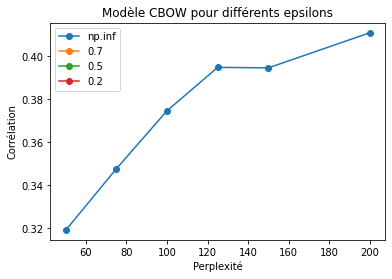

In [4]:
#Etude de la perplexité et de epsilon
x = np.array([50,75,100,125,150,200])
correlation=[]
correlation1=[]
correlation2=[]
correlation3=[]
for i in range(len(mod_tsne)):
    c=correlation_epsilon(initial_distance=initial_distance_cbow,new_distance=mod_tsne[i],epsilon=np.inf)
    c1=correlation_epsilon(initial_distance=initial_distance_cbow,new_distance=mod_tsne[i],epsilon=0.7)
    c2=correlation_epsilon(initial_distance=initial_distance_cbow,new_distance=mod_tsne[i],epsilon=0.5)
    c3=correlation_epsilon(initial_distance=initial_distance_cbow,new_distance=mod_tsne[i],epsilon=0.2)
    correlation.append(c)
    correlation1.append(c1)
    correlation2.append(c2)
    correlation3.append(c3)

plt.plot(x, correlation, "o-",label="np.inf")
plt.plot(x, correlation1, "o-",label="0.7")
plt.plot(x, correlation2,"o-", label= "0.5")
plt.plot(x, correlation3,"o-",label="0.2")
plt.legend()
plt.xlabel("Perplexité")
plt.ylabel("Corrélation")
plt.title("Modèle CBOW pour différents epsilons")

plt.show()

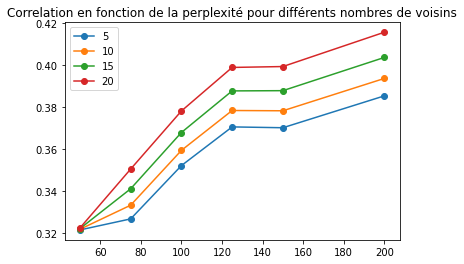

In [44]:
#Etude de la perplexité et du nb de voisins
x = np.array([50,75,100,125,150,200])
correlation=[]
correlation1=[]
correlation2=[]
correlation3=[]
for i in range(len(mod_tsne)):
    c=correlation_neighboor(initial_distance=initial_distance_cbow,new_distance=mod_tsne[i],k=5)
    c1=correlation_neighboor(initial_distance=initial_distance_cbow,new_distance=mod_tsne[i],k=10)
    c2=correlation_neighboor(initial_distance=initial_distance_cbow,new_distance=mod_tsne[i],k=15)
    c3=correlation_neighboor(initial_distance=initial_distance_cbow,new_distance=mod_tsne[i],k=20)
    correlation.append(c)
    correlation1.append(c1)
    correlation2.append(c2)
    correlation3.append(c3)

plt.plot(x, correlation, "o-",label="5")
plt.plot(x, correlation1, "o-",label="10")
plt.plot(x, correlation2,"o-", label= "15")
plt.plot(x, correlation3,"o-",label="20")
plt.legend()
plt.xlabel("Perplexité")
plt.ylabel("Corrélation")
plt.title("Modèle CBOW pour différents nombres de voisins")
plt.show()

In [5]:
#Test d'égalité Kolmogorov
from scipy.stats import ks_2samp
print("p=50",ks_2samp(flat_matrix(initial_distance_cbow), flat_matrix(mod_tsne[0])))
print("p=75",ks_2samp(flat_matrix(initial_distance_cbow), flat_matrix(mod_tsne[1])))
print("p=100",ks_2samp(flat_matrix(initial_distance_cbow), flat_matrix(mod_tsne[2])))
print("p=125",ks_2samp(flat_matrix(initial_distance_cbow), flat_matrix(mod_tsne[3])))
print("p=150",ks_2samp(flat_matrix(initial_distance_cbow), flat_matrix(mod_tsne[4])))
print("p=200",ks_2samp(flat_matrix(initial_distance_cbow), flat_matrix(mod_tsne[5])))

p=50 KstestResult(statistic=0.9557605419726614, pvalue=0.0)
p=75 KstestResult(statistic=0.9830009142154352, pvalue=0.0)
p=100 KstestResult(statistic=0.9942970697497838, pvalue=0.0)
p=125 KstestResult(statistic=0.9973879274159866, pvalue=0.0)
p=150 KstestResult(statistic=0.9991026656600925, pvalue=0.0)
p=200 KstestResult(statistic=0.9996601627262269, pvalue=0.0)


# SKIPGRAM MDS

In [6]:
skipgram_model = pd.read_csv('data/tuning/MDS/skipgram_mds_embedding.csv',sep=";")
data = pd.DataFrame(skipgram_model)
initial_distance_skipgram = euclidean_distances(data)

X = data.values
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [7]:
mod_tsne_skipgram=[]
divergence_skipgram=[]
for index, p in enumerate([50,75,100,125,150,200]):
    tsne = TSNE(n_components = 2, perplexity=p, n_iter=2000, random_state=0)
    tsne_results = tsne.fit_transform(X_scaled)
    tsne_distance = euclidean_distances(tsne_results)
    mod_tsne_skipgram.append(tsne_distance)  
    divergence_skipgram.append(tsne.kl_divergence_)

/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/id1897/.local/lib/python3.9/site-packages/sklearn/

### Etude hyperparamètres

/home/id1897/.local/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


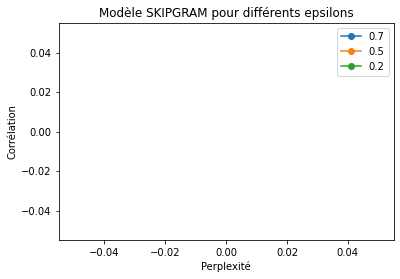

In [10]:
#Etude de la perplexité et de epsilon
x = np.array([50,75,100,125,150,200])
correlation=[]
correlation1=[]
correlation2=[]
correlation3=[]
for i in range(len(mod_tsne)):
    c=correlation_epsilon(initial_distance=initial_distance_skipgram,new_distance=mod_tsne_skipgram[i],epsilon=np.inf)
    c1=correlation_epsilon(initial_distance=initial_distance_skipgram,new_distance=mod_tsne_skipgram[i],epsilon=0.7)
    c2=correlation_epsilon(initial_distance=initial_distance_skipgram,new_distance=mod_tsne_skipgram[i],epsilon=0.5)
    c3=correlation_epsilon(initial_distance=initial_distance_skipgram,new_distance=mod_tsne_skipgram[i],epsilon=0.2)
    correlation.append(c)
    correlation1.append(c1)
    correlation2.append(c2)
    correlation3.append(c3)

#plt.plot(x, correlation, "o-",label="np.inf")
plt.plot(x, correlation1, "o-",label="0.7")
plt.plot(x, correlation2,"o-", label= "0.5")
plt.plot(x, correlation3,"o-",label="0.2")
plt.legend()
plt.xlabel("Perplexité")
plt.ylabel("Corrélation")
plt.title("Modèle SKIPGRAM pour différents epsilons")
plt.show()

In [51]:
#Etude de la perplexité et du nb de voisins
x = np.array([50,75,100,125,150,200])
correlation=[]
correlation1=[]
correlation2=[]
correlation3=[]
for i in range(len(mod_tsne)):
    c=correlation_neighboor(initial_distance=initial_distance_skipgram,new_distance=mod_tsne_skipgram[i],k=5)
    c1=correlation_neighboor(initial_distance=initial_distance_skipgram,new_distance=mod_tsne_skipgram[i],k=10)
    c2=correlation_neighboor(initial_distance=initial_distance_skipgram,new_distance=mod_tsne_skipgram[i],k=15)
    c3=correlation_neighboor(initial_distance=initial_distance_skipgram,new_distance=mod_tsne_skipgram[i],k=20)
    correlation.append(c)
    correlation1.append(c1)
    correlation2.append(c2)
    correlation3.append(c3)

plt.plot(x, correlation, "o-",label="5")
plt.plot(x, correlation1, "o-",label="10")
plt.plot(x, correlation2,"o-", label= "15")
plt.plot(x, correlation3,"o-",label="20")
plt.legend()
plt.xlabel("Perplexité")
plt.ylabel("Corrélation")
plt.title("Modèle SKIPGRAM pour différents nombres de voisins")
plt.show()

In [9]:
#Test d'égalité Kolmogorov
from scipy.stats import ks_2samp
print("p=50",ks_2samp(flat_matrix(initial_distance_skipgram), flat_matrix(mod_tsne_skipgram[0])))
print("p=75",ks_2samp(flat_matrix(initial_distance_skipgram), flat_matrix(mod_tsne_skipgram[1])))
print("p=100",ks_2samp(flat_matrix(initial_distance_skipgram), flat_matrix(mod_tsne_skipgram[2])))
print("p=125",ks_2samp(flat_matrix(initial_distance_skipgram), flat_matrix(mod_tsne_skipgram[3])))
print("p=150",ks_2samp(flat_matrix(initial_distance_skipgram), flat_matrix(mod_tsne_skipgram[4])))
print("p=200",ks_2samp(flat_matrix(initial_distance_skipgram), flat_matrix(mod_tsne_skipgram[5])))

p=50 KstestResult(statistic=0.9948434456743644, pvalue=0.0)
p=75 KstestResult(statistic=0.9989378866742827, pvalue=0.0)
p=100 KstestResult(statistic=0.9997257597384591, pvalue=0.0)
p=125 KstestResult(statistic=0.9997734787402653, pvalue=0.0)
p=150 KstestResult(statistic=0.9997860177165988, pvalue=0.0)
p=200 KstestResult(statistic=0.9997890970765111, pvalue=0.0)
